In [16]:
import numpy as np 
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt


In [6]:
  ROOT='./kaggle/input/dt23-test/'
  adjusted_close = pd.read_csv(ROOT+'series/adjusted_close.csv',index_col=0)
  adjusted_close.index = pd.to_datetime(adjusted_close.index)

  close_df = pd.read_csv(ROOT+'series/close.csv', index_col = 0)
  close_df.index = pd.to_datetime(close_df.index)
  # Uncomment the following line to test the notebook on a reduced number of 
  # products that span the entire makespan
  # adjusted_close = adjusted_close.dropna(axis=1).iloc[:,:20]

  # print(adjusted_close.head())


In [7]:

def polynomial_regression(past_prices):
    """
        Fits a 3d degree polynomial for each asset and returns the predicted value
    """
    past_prices.index = pd.to_datetime(past_prices.index)

    models={}

    # Fitting a 3d degree polynomial for each asset
    for c in past_prices.columns:
        x=past_prices[[c]]
        xp = PolynomialFeatures(degree=3).fit_transform(np.arange(len(x)).reshape((len(x),1)))
        model = sm.OLS(x.values, xp).fit()
        models[c] = model

    # Returning the next value of each polynomial
    return pd.DataFrame({k:v.predict(PolynomialFeatures(degree=3).fit_transform(np.array([len(x)]).reshape((1,1)))) for k,v in models.items()})/past_prices.iloc[-1]

    poly_df = polynomial_regression(adjusted_close)

    print(poly_df.head())
  

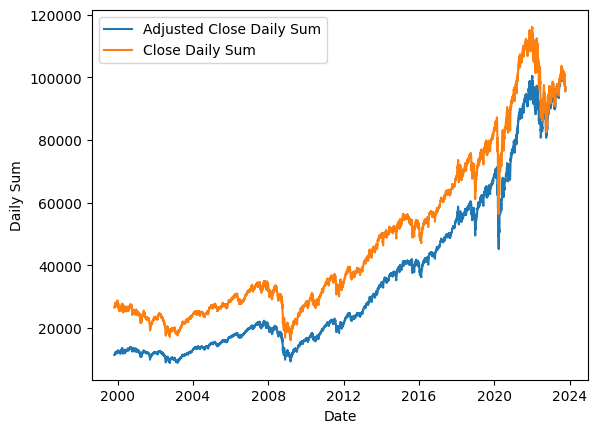

In [11]:
adjusted_close['daily_sum'] = adjusted_close.sum(axis=1)
close_df['daily_sum'] = close_df.sum(axis=1)

adjusted_close.head()


# Assuming you have already calculated 'daily_sum' for both dataframes
# adjusted_close and close_df

# Plotting the 'daily_sum' from adjusted_close
plt.plot(adjusted_close['daily_sum'], label='Adjusted Close Daily Sum')

# Plotting the 'daily_sum' from close_df
plt.plot(close_df['daily_sum'], label='Close Daily Sum')

# Adding labels and a legend
plt.xlabel('Date')
plt.ylabel('Daily Sum')
plt.legend()

# Display the plot
plt.show()


            Unnamed: 0  market_cap_ZION  market_cap_XYL  market_cap_MAR  \
date                                                                      
2018-10-31           5     9.257556e+09    1.222429e+10    4.125289e+10   
2018-11-01           6     9.257556e+09    1.222429e+10    4.125289e+10   
2018-11-02           7     9.257556e+09    1.222429e+10    4.125289e+10   
2018-11-03           8     9.640005e+09    1.273828e+10    3.992589e+10   
2018-11-04           9     9.640005e+09    1.273828e+10    3.992589e+10   

            market_cap_HBAN  market_cap_CMI  market_cap_TAP  market_cap_EOG  \
date                                                                          
2018-10-31     1.516925e+10    2.277241e+10    1.361948e+10    5.935307e+10   
2018-11-01     1.516925e+10    2.277241e+10    1.361948e+10    5.935307e+10   
2018-11-02     1.516925e+10    2.277241e+10    1.361948e+10    5.935307e+10   
2018-11-03     1.557263e+10    2.297151e+10    1.391725e+10    6.118557e+10   


ConversionError: Failed to convert value(s) to axis units: array(['2023-10-06T00:00:00.000000000', '2023-10-05T00:00:00.000000000',
       '2023-10-04T00:00:00.000000000', ...,
       '1999-11-03T00:00:00.000000000', '1999-11-02T00:00:00.000000000',
       '1999-11-01T00:00:00.000000000'], dtype='datetime64[ns]')

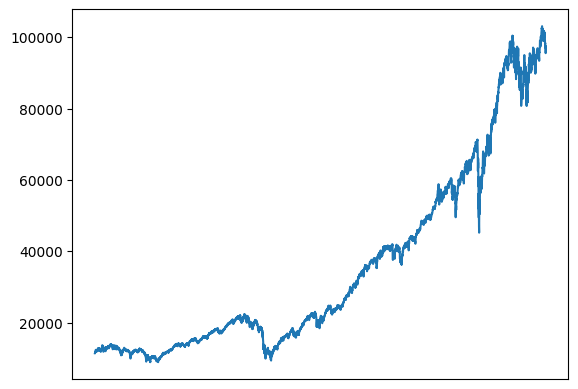

In [24]:

# Read the market_cap.csv file and set the 'date' column as the index
market_cap_df = pd.read_csv(ROOT + 'series/additional_data/market_cap.csv')
market_cap_df['date'] = pd.to_datetime(market_cap_df['date'])  # Convert 'date' to datetime
market_cap_df.set_index('date', inplace=True)

# Calculate the 'daily_sum' column
market_cap_df['daily_sum'] = market_cap_df.sum(axis=1)

# Sort the DataFrame by 'date' in ascending order
market_cap_df.sort_index(inplace=True)

# Plotting the 'daily_sum'
plt.plot(market_cap_df.index, market_cap_df['daily_sum'], label='Market Cap Daily Sum')

# Adding labels and a legend
plt.xlabel('Date')
plt.ylabel('Daily Sum')
plt.legend()

# Display the plot
plt.show()